In [1]:
######################################
### Sistemas Baseados em Conhecimento
### Notebook: N02 (Redes Bayesianas)
######################################

#!pip install pgmpy

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

ModuleNotFoundError: No module named 'pgmpy'

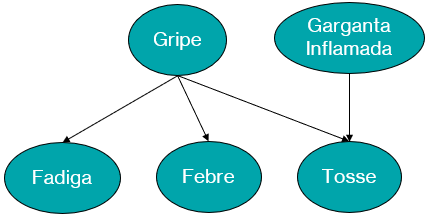


In [ ]:
# Definicao da estrutura da Rede Bayesiana
model = BayesianNetwork(
    [
        ("Gripe", "Febre"),
        ("Gripe", "Fadiga"),
        ("Gripe", "Tosse"),
        ("GargantaInflamada", "Tosse"),
    ]
)

In [ ]:
# Considere o levantamento de pessoas que chegam em um hospital
# Definicao das distribuicoes probabilisticas condicionais(CPDs)

cpd_gripe = TabularCPD(variable="Gripe", variable_card=2, values=[[0.7], [0.3]])

cpd_gargantaInflamada = TabularCPD(
    variable="GargantaInflamada", variable_card=2, values=[[0.8], [0.2]]
)

cpd_fadiga = TabularCPD(
    variable="Fadiga",
    variable_card=2,
    values=[[0.8, 0.5], [0.2, 0.5]],
    evidence=["Gripe"],
    evidence_card=[2],
)

cpd_febre = TabularCPD(
    variable="Febre",
    variable_card=2,
    values=[[0.9, 0.6], [0.1, 0.4]],
    evidence=["Gripe"],
    evidence_card=[2],
)

cpd_tosse = TabularCPD(
    variable="Tosse",
    variable_card=2,
    values=[[0.7, 0.4, 0.1, 0.6], [0.3, 0.6, 0.9, 0.4]],
    evidence=["Gripe", "GargantaInflamada"],
    evidence_card=[2, 2],
)

# Adicionar as tabelas ao modelo
model.add_cpds(cpd_gripe, cpd_gargantaInflamada, cpd_febre, cpd_fadiga, cpd_tosse)

# Verificar se o modelo eh consistente
print(model.check_model())

In [ ]:
# Print the CPDs
print(model.get_cpds("Gripe"))
print(model.get_cpds("GargantaInflamada"))
print(model.get_cpds("Febre"))
print(model.get_cpds("Fadiga"))
print(model.get_cpds("Tosse"))

In [ ]:
# Exemplo de inferencia: computar probabilidade

# Computar probabilidade de ter Febre dado que tivemos Gripe.

from pgmpy.inference import VariableElimination

# Create tipo de inferencia
inference = VariableElimination(model)


prob_febre_tendo_gripe = inference.query(variables=["Febre"], evidence={"Gripe": 1})
print(prob_febre_tendo_gripe)

In [ ]:
# Exemplo 2: Predicao de sintomas
# Suponha que um medico observe que um paciente tem garganta inflamanda e quer indicar a probabilidade do mesmo
#   ter tosse e gripe.
# Ou seja, computar a probabilidade de tosse e gripe dada a evidencia de garganta inflamada

prob_tosse_gripe_dado_gargantainflamada = inference.query(
    variables=["Tosse", "Gripe"], evidence={"GargantaInflamada": 1}
)
print(prob_tosse_gripe_dado_gargantainflamada)

In [ ]:
# Exemplo 3: Updating Probabilities with New Evidence

# Digamos que o medico oberva que um paciente tem tanto garganta  como tosse,
#   e tal medico quer obter a probabilidade dele ter gripe.

prob_gripe_dado_sintomas = inference.query(
    variables=["Gripe"], evidence={"GargantaInflamada": 1, "Tosse": 1}
)
print(prob_gripe_dado_sintomas)

In [ ]:
# Example 4: Prever multiplos sintomas
## Considere que o medico sabe que a pessoa tem fadiga e quer prever a probabilidade dele ter Febre e tosse.

prob_febre_tosse_dado_fadiga = inference.query(
    variables=["Febre", "Tosse"], evidence={"Fadiga": 1}
)
print(prob_febre_tosse_dado_fadiga)

In [ ]:
# Example 5: Probabilidade de ter gripe e garganta inflamada sabendo que se tem febre e fadiga

prob_grip_gargantainflamanda_dado_febre_fadiga = inference.query(
    variables=["Gripe", "GargantaInflamada"], evidence={"Febre": 1, "Fadiga": 1}
)
print(prob_grip_gargantainflamanda_dado_febre_fadiga)

In [ ]:
# Example 6: Sem nenhuma evidencia sobre doencas, computar a probabilidade de se ter garganta inflamada e tosse.

# Computing the probability of SoreThroat and Cough
prob_gargantainflamanda_tosse = inference.query(
    variables=["GargantaInflamada", "Tosse"], evidence={}
)
print(prob_gargantainflamanda_tosse)